---
---

# ANALISIS DE PRESTAMOS PERSONALES BANCARIOS
---
---


### Analisis de clasificación para un conjunto de datos del banco "Thera Bank", cuya administración desea explorar formas de convertir a sus clientes pasivos en clientes con préstamos personales, ademas retenerlos y que  tengan sus depositos en el banco. 
---

ID: customer Id

Age:customer's age in completed years

Experience:years of professional experience

Income<:Annual income of the customer

ZIP Code:Address Zip code

Family:family size of customer

CCAvg:Avg. spending on credit card per month
due to all other parameter is annually so i converted it for per year

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account:Does the customer have a securities account with the bank?

CD Account:Does the customer have a certificate of deposit(CD) account with the bank?

Online:Does the customer use internet banking facilities

CreditCard: Does the customer use a credit card issued by universalBank?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Bank_Personal_Loan.csv')
df.head(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0/40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1/50,2,0,0,0,0,1,0


In [3]:
# Elimino columna que no me sirve para el analisis
df = df.drop(columns=['ZIP Code'])
df = df.drop(columns=['CCAvg'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  5000 non-null   int64
 1   Age                 5000 non-null   int64
 2   Experience          5000 non-null   int64
 3   Income              5000 non-null   int64
 4   Family              5000 non-null   int64
 5   Education           5000 non-null   int64
 6   Mortgage            5000 non-null   int64
 7   Personal Loan       5000 non-null   int64
 8   Securities Account  5000 non-null   int64
 9   CD Account          5000 non-null   int64
 10  Online              5000 non-null   int64
 11  CreditCard          5000 non-null   int64
dtypes: int64(12)
memory usage: 468.9 KB


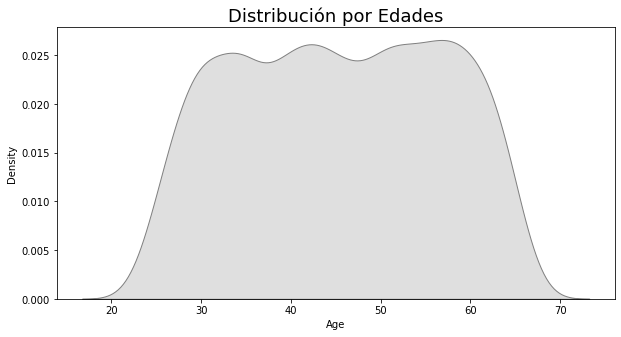

In [5]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Age'], color='gray', fill=True)
plt.title('Distribución por Edades', fontsize=18)
plt.grid(False)
plt.show()

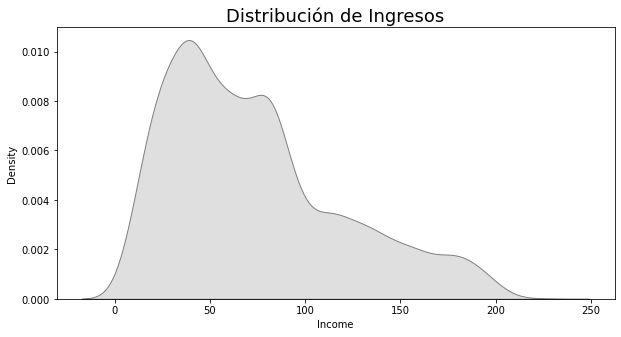

In [6]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Income'], color='gray', fill=True)
plt.title('Distribución de Ingresos', fontsize=18)
plt.grid(False)
plt.show()

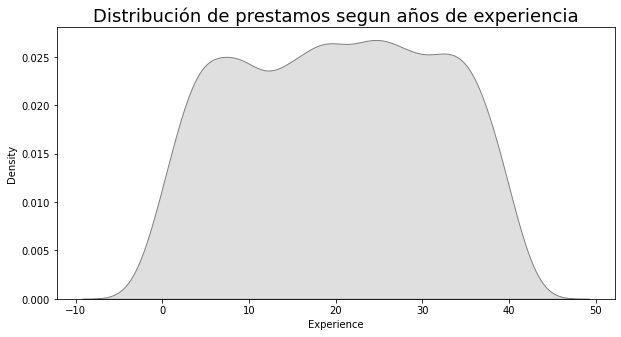

In [7]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Experience'], color='gray', fill=True)
plt.title('Distribución de prestamos segun años de experiencia', fontsize=18)
plt.grid(False)
plt.show()

In [8]:
df.describe()

,ID,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df.corr()

,ID,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,-0.016797,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.046418,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.052563,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.157501,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.016797,-0.046418,-0.052563,-0.157501,1.000000,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
Education,0.021463,0.041334,0.013152,-0.187524,0.064929,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,-0.020445,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.061367,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.019994,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,-0.006909,0.008043,0.010353,0.169738,0.014110,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


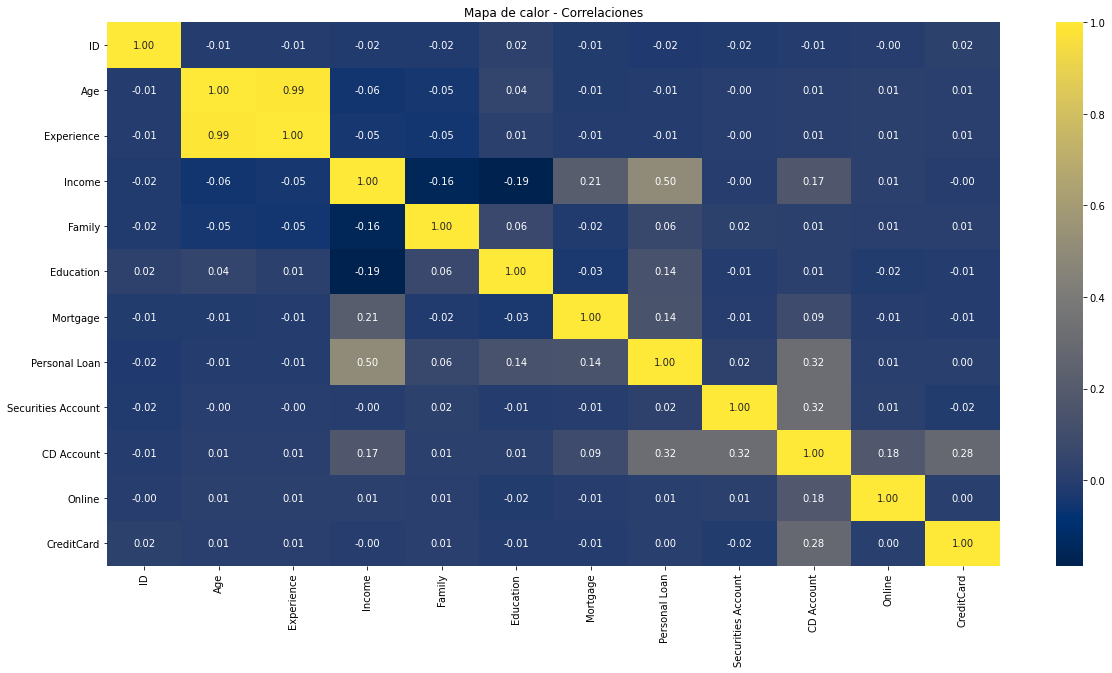

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='cividis')
plt.title('Mapa de calor - Correlaciones')
plt.show()

In [11]:
sns.set() # Le decimos a Seaborn que grafique con la configuracion de defecto.

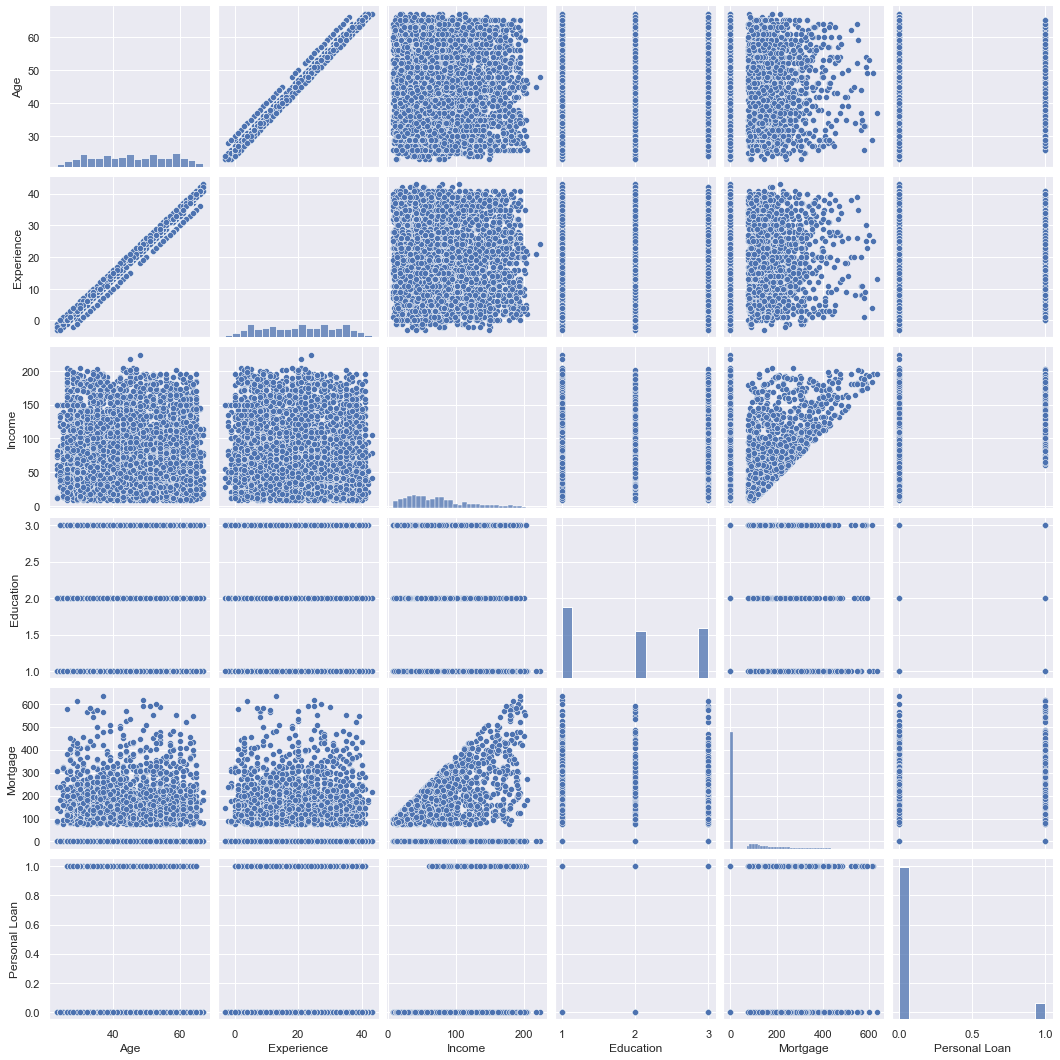

In [12]:
cols = ["Age", "Experience", "Income", "Education", "Mortgage", "Personal Loan"]

sns.pairplot(df[cols], height=2.5)
plt.show()

---
## Arboles de Decision
---

In [13]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [14]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Personal Loan"]
X = data.drop(["Personal Loan"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [15]:
tree = DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=11)

# Max depth acorta el arbol si no salia muy extenso, en contraparte reduce la presición del modelo
# min_samples_leaf define el número mínimo de muestras usadas en una hoja (nodo final). Evita hojas con muy pocas muestras.
# max_leaf_nodes limita el número máximo de hojas (nodos finales), ayuda a controlar la complejidad del árbol.

In [16]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=5, random_state=11)

In [17]:
# Ver la precisión y poder compararla

print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")



La precisión del Arbol de decisión es de: 0.9775757575757575


---
Este resultado me indica que este modelo es capas de predecir correctamente el 99.75% de las muestras del conjunto de prueba. Es un rendimiento razonable para seguir analizando puesto que es una practica.
Aqui en este caso la presicion del arbol de decisión es cercana al "1.0", lo que indica en principio que es un muy preciso,
pero no necesariamente esto puede indicar que este 100% correcto, puede que este sobreajustado el modelo, por lo que corro otro analisis con validación cruzada para para descartar que este sucediendo esto.
---

In [18]:
modelo = DecisionTreeClassifier(random_state=11)

from sklearn.model_selection import cross_val_score
puntuaciones = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

print("Precisión en validación cruzada:", puntuaciones.mean())

Precisión en validación cruzada: 0.9666


In [19]:
# Graficando el arbol

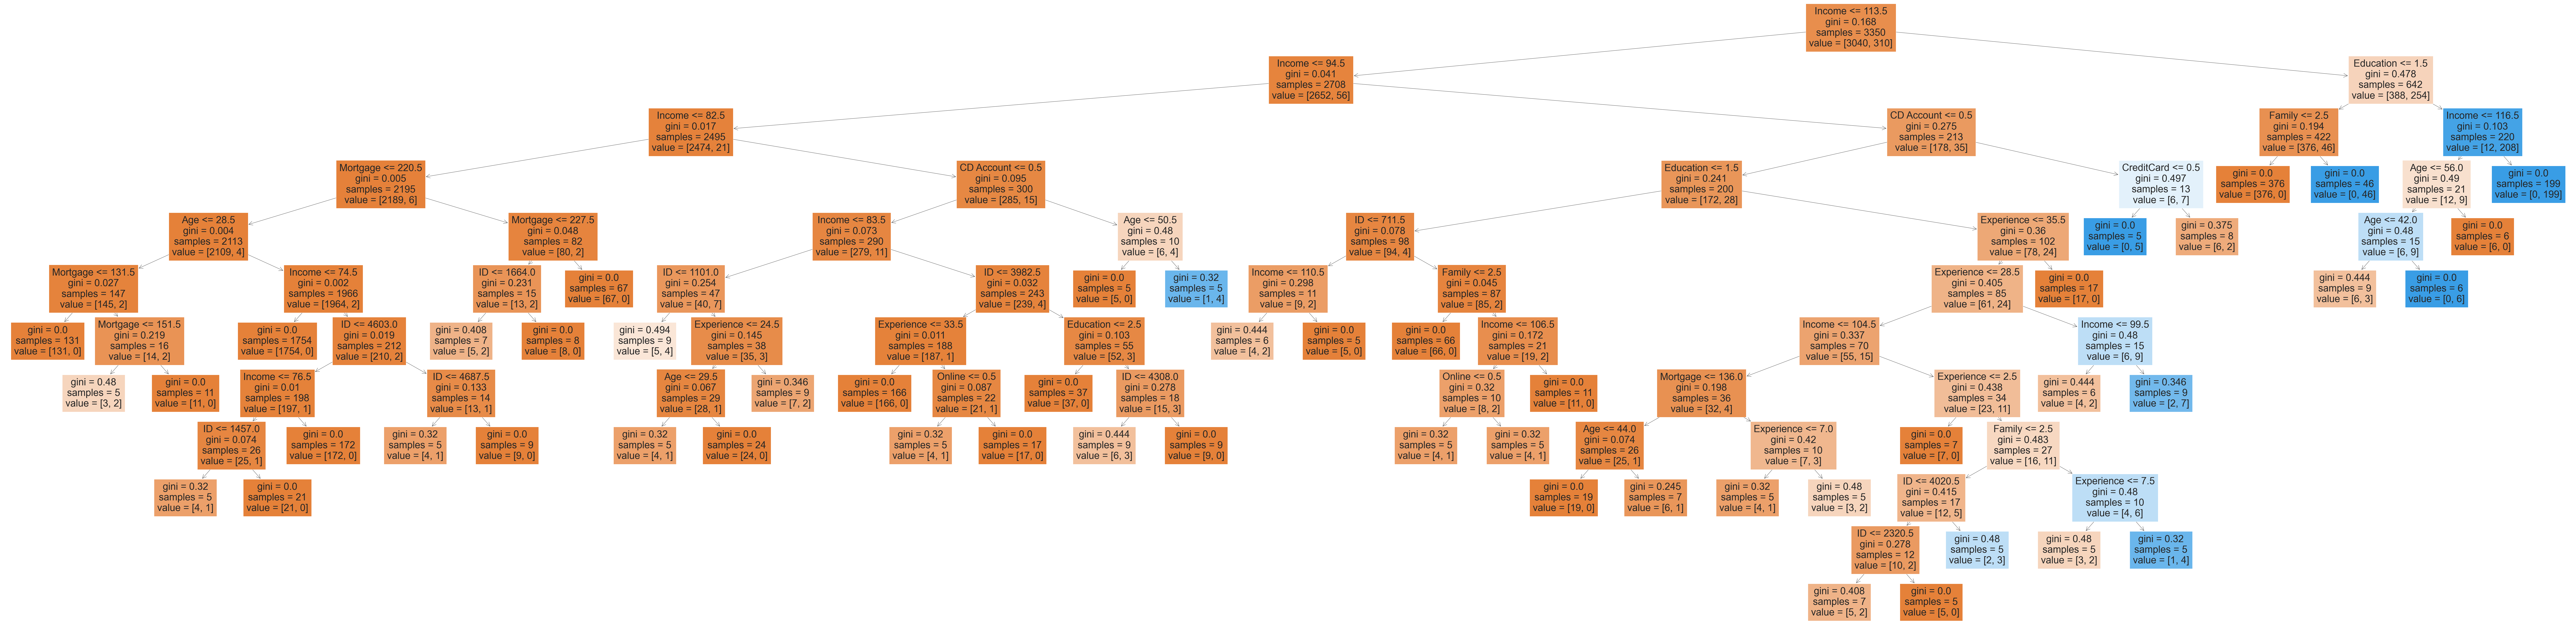

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol
plt.figure(figsize=(200, 50))  # Tamaño de la figura

plot_tree(tree,filled=True, feature_names=X_train.columns)
plt.show()

Interpretando este modelo: La condicion principal es "Income", si el valor de ingresos (Income) es menor a 113,5 se sigue por la
rama de color marron (a la izquierda), si se da el valor contrario sera por la rama derecha. Luego la proxima rama tendra la
condición principal "Income" nuevamente si cumple seguirá por la rama en marron. En cada rama tenemos por ejemplo los datos "value=[2652,56]" y "samples=2708", para interpretar esto tenemos que dividir 2652/2708 para saber que la probabilidad de que salga en esta rama es de 97.93%

Otro dato importante es que cuanto más cercano a 0 sea el valor del coeficiente de Gini, mayor será la pureza en términos de clasificación de las muestras en esa hoja. Al contrario si tenemos un valor más alto o alejado de 0, indica una mezcla de diferentes clases en las muestras lo que hace que pierda pureza.

### Calculando predicciones para probar

In [21]:
print(df.iloc[[999]].to_string(index=False))

  ID  Age  Experience  Income  Family  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
1000   60          35      18       1          2         0              0                   0           0       1           1


In [22]:
# Para ejemplificar voy a definir la variable segun los valores de la fila 999.
dato1 = 60, 35, 18, 1, 2, 0, 0, 0, 0, 0, 1
prediction = tree.predict_proba([dato1])
print (prediction)

[[1. 0.]]


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


El resultado significa que:

- 100% de probabilidad de pertenecer a la clase 0 (Sin préstamo)
- 0% de probabilidad de pertenecer a la clase 1 (Se le otorgaria un préstamo)

---
## Bosques Aleatorios (Random Forest)
---

In [23]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Personal Loan"]
X = data.drop(["Personal Loan"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

Como se componen los datos:

El dataset se compone de 11 columnas. 10 corresponden a variables independientes, que usaremos para predecir el target y 1 (Personal Loan) es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos

In [24]:
model = RandomForestClassifier(random_state=10, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.9812121212121212


In [25]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [26]:
predictions=classifier.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
print()
print ("Cuanto menor sea el valor, mejor será el rendimiento del modelo. Un MSE igual a cero indica predicciones perfectas.")

El error (rmse) de test es: 0.13706888336846837

Cuanto menor sea el valor, mejor será el rendimiento del modelo. Un MSE igual a cero indica predicciones perfectas.


Matriz de confusión
[[1473    7]
 [  24  146]]
Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos_FN, (b) seran los falsos positivos_FP



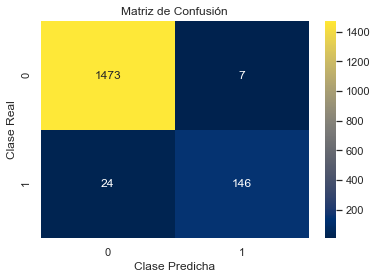


Métricas de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1480
           1       0.95      0.86      0.90       170

    accuracy                           0.98      1650
   macro avg       0.97      0.93      0.95      1650
weighted avg       0.98      0.98      0.98      1650

0.9812121212121212

La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los
casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la 
diagonal de la matriz de confusión), y la suma de todos los casos.
Cuando un conjunto de datos es poco equilibrado, no es una métrica útil

La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util
cuando los datos no son tan equilibrados. En otras palabras, representa la tasa

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Matriz de confusión")
print(confusion_matrix(y_test,predictions))
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos_FN, (b) seran los falsos positivos_FP")
print()
# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis')

# Agregar etiquetas y títulos
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

# Mostrar el gráfico
plt.show()

print()
print("Métricas de clasificación")
print("-----------------------------------------------------")
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

print ()
print ("La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los")
print ("casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la ")
print ("diagonal de la matriz de confusión), y la suma de todos los casos.")
print ("Cuando un conjunto de datos es poco equilibrado, no es una métrica útil")
print ()
print ("La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util")
print ("cuando los datos no son tan equilibrados. En otras palabras, representa la tasa de verdaderos positivos")
print ("(True Positive Rate) ó TP. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al ")
print ("total de positivos.")

In [29]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': classifier.feature_importances_}
                            )
print()
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,Income,0.576209
5,Education,0.101797
4,Family,0.068633
8,CD Account,0.058825
0,ID,0.048088
6,Mortgage,0.047915
2,Experience,0.036751
1,Age,0.036638
10,CreditCard,0.010090
9,Online,0.009454


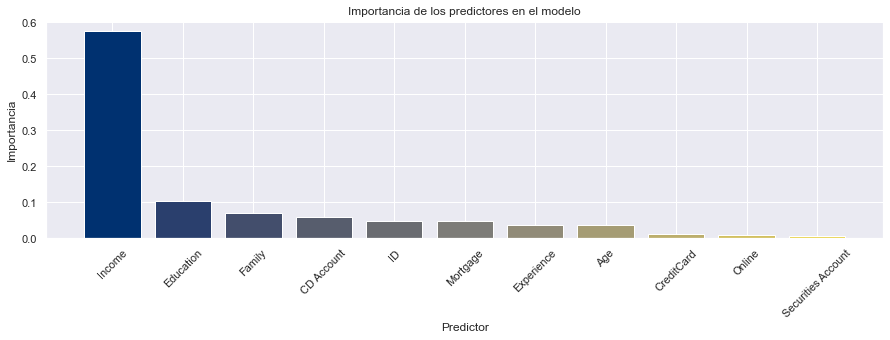

In [30]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(15, 4))

# Ordenar los predictores por importancia descendente
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False)

# Graficar la importancia de los predictores
colores = sns.color_palette("cividis", n_colors=len(importancia_predictores))

ax.bar(importancia_predictores['predictor'], importancia_predictores['importancia'], color = colores)

# Personalizar la apariencia del gráfico
ax.set_xlabel('Predictor')
ax.set_ylabel('Importancia')
ax.set_title('Importancia de los predictores en el modelo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

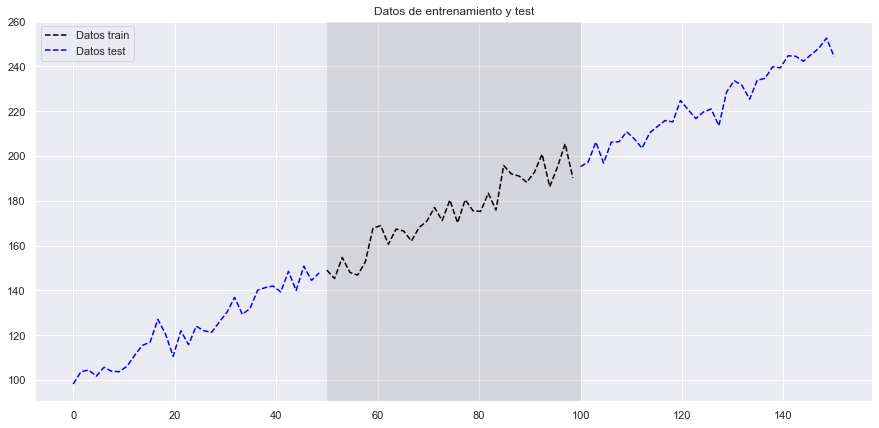

In [31]:
# Datos simulados
# ==============================================================================
X = np.linspace(0, 150, 100)
y = (X + 100) + np.random.normal(loc=0.0, scale=5.0, size=X.shape)
X_train = X[(X>=50) & (X<100)]
y_train = y[(X>=50) & (X<100)]
X_test_inf = X[X < 50]
y_test_inf = y[X < 50]
X_test_sup = X[X >= 100]
y_test_sup = y[X >= 100]

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.set_title("Datos de entrenamiento y test")
plt.legend();

In [32]:
print (classifier.predict ([[60, 35, 18, 1, 2, 0, 0, 0, 0, 0, 1]]))

[0]


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Resultado, [0] quiere decir que clasifico como "Sin prestamo" a la persona cuyos datos quisimos predecir. Luego corro la probabilidad de que sea sin prestamo y da un valor de 99% y un 0,1% de probabilidad de tener un prestamo

In [33]:
print (classifier.predict ([[60, 35, 2018, 1, 2, 0, 0, 0, 0, 0, 1]]))

[0]


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
print(classifier.predict_proba([[60, 35, 2018, 1, 2, 0, 0, 0, 0, 0, 1]]))

[[0.985 0.015]]


c:\users\nestor\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


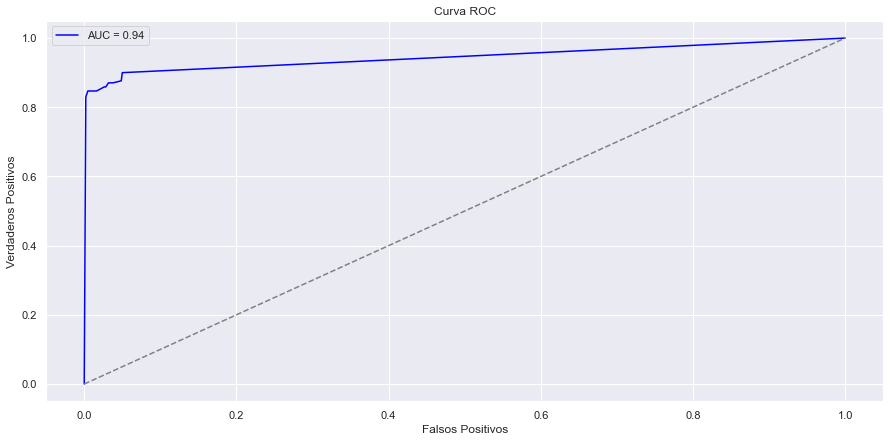

In [35]:
from sklearn.metrics import roc_curve, auc

y_prob = tree.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 7))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

Interpretación: Cuanto más cerca del valor "1" esté el AUC (Area Under the Curve ó Area Bajo la Curva), mejor sera el modelo.
- AUC = 1.0 → Clasificación perfecta
- AUC = 0.5 → Clasificación aleatoria
- AUC < 0.5 → Peor que aleatorio (invirtió las clases)

ROC (Receiver Operating Characteristic ó Característica Operativa del Receptor) es un gráfico que muestra la capacidad de un modelo de clasificación para distinguir entre clases. Representa la relación entre:

- Eje X: Tasa de Falsos Positivos (FPR) = FP / (FP + TN)
- Eje Y: Tasa de Verdaderos Positivos (TPR) = TP / (TP + FN)
En la curva ROC un modelo perfecto tiene una curva que sube rápidamente a TPR=1 sin apenas moverse en FPR como la de estos datos
en contrapartida un modelo aleatorio tiene una curva diagonal (y = x).

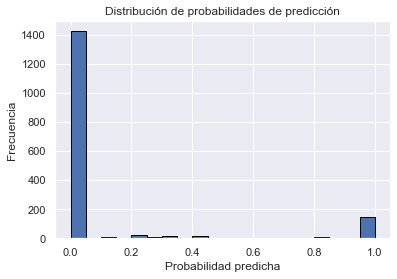

In [36]:
plt.hist(y_prob, bins=20, edgecolor="black")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia")
plt.title("Distribución de probabilidades de predicción")
plt.show()

# Si hay muchas predicciones en el valor 0,5 el modelo seria incierto. 

---
## k-Nearest Neighbors (KNN)
---

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
X = df[['Age', 'Experience', 'Income', 'Family', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']]
y = df['CreditCard']

In [39]:
print("Forma de X:", X.shape)  # X debería tener la forma (n_muestras, n_features)
print("Forma de y:", y.shape)  # y debería tener la forma (n_muestras,)

Forma de X: (5000, 10)
Forma de y: (5000,)


In [40]:
# Divido los datos en datos de entrenamiento y los que se usaran para pruebas.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = StandardScaler()

In [42]:
# Ajustar y transformar X_train, luego transformar X_test (sin ajustar)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.model_selection import train_test_split

# X e y deben tener el mismo número de muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)  # Debería ser (80, n_features)
print("Forma de y_train:", y_train.shape)  # Debería ser (80,)

Forma de X_train: (4000, 10)
Forma de y_train: (4000,)


In [44]:
# Crear el clasificador KNN con k=3 (3 vecinos más cercanos)
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo KNN con los datos escalados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.669

Matriz de confusión:
 [[578 130]
 [201  91]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       708
           1       0.41      0.31      0.35       292

    accuracy                           0.67      1000
   macro avg       0.58      0.56      0.57      1000
weighted avg       0.65      0.67      0.65      1000



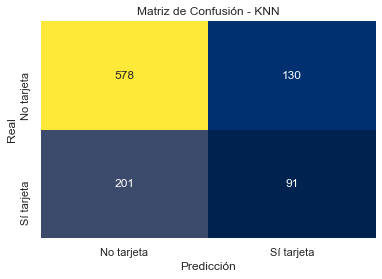

[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)
[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)

Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos FN, (b) seran los falsos positivos FP



In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico tipo heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False,
            xticklabels=["No tarjeta", "Sí tarjeta"],
            yticklabels=["No tarjeta", "Sí tarjeta"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

print("[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)")
print( "[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)")
print()
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos FN, (b) seran los falsos positivos FP")
print()

### Problemas identificados: Actualmente este modelo KNN tiene un rendimiento pobre con una certeza de solo 67%, osea que acierta solo el 67% y se están perdiendo demasiados casos positivos (clientes que sí aceptarían tarjeta).

### Alto número de Falsos Negativos (201) - Hay una falla en el modelo en identificar muchos casos positivos

### Desequilibrio en las predicciones - Predice mejor la clase negativa (578 correctos) que la positiva (91 correctos)

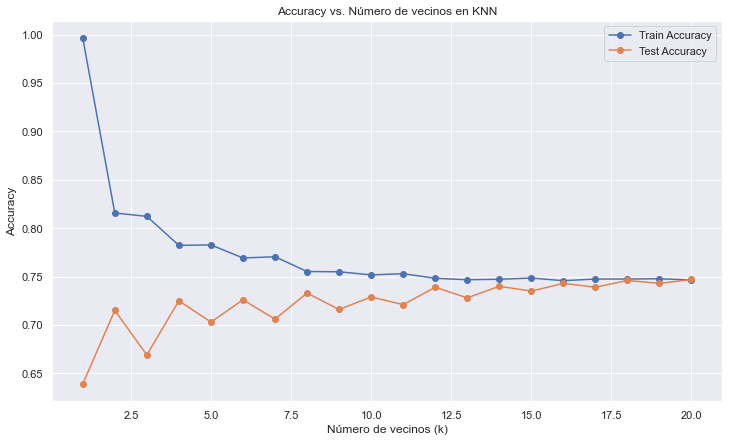

In [47]:
# Como 67% de aciertos es poco, corro este grafico para analizar cuál es el k óptimo 
# (que no sea muy bajo → sobreajuste, ni muy alto → subajuste).

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_range = range(1, 21)  # pruebo de 1 a 20 vecinos
train_acc = []
test_acc = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_acc.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

# Graficar
plt.figure(figsize=(12,7))
plt.plot(k_range, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_range, test_acc, marker='o', label='Test Accuracy')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Número de vecinos en KNN")
plt.legend()
plt.show()

In [53]:
# Crear el clasificador KNN con k=20 (20 vecinos más cercanos)
knn = KNeighborsClassifier(n_neighbors=20)

# Entrenar el modelo KNN con los datos escalados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20)

In [55]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.747

Matriz de confusión:
 [[697  11]
 [242  50]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.98      0.85       708
           1       0.82      0.17      0.28       292

    accuracy                           0.75      1000
   macro avg       0.78      0.58      0.56      1000
weighted avg       0.76      0.75      0.68      1000



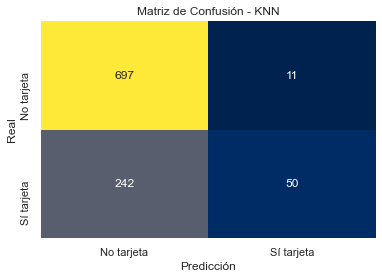

[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)
[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)

Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos FN, (b) seran los falsos positivos FP



In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico tipo heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False,
            xticklabels=["No tarjeta", "Sí tarjeta"],
            yticklabels=["No tarjeta", "Sí tarjeta"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

print("[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)")
print( "[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)")
print()
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos FN, (b) seran los falsos positivos FP")
print()

### En conclución el nuevo estudio otorga una mejor precisión pero tiene poco "Recall" (detecta pocos clientes reales), el modelo estaría desbalanceado.

In [70]:
# Crear el clasificador KNN con k=18 (18 vecinos más cercanos) y cambio la metrica donde vecinos mas cercanos pesan mas
# (ayuda a detectar mejor la clase minoritaria)
knn = KNeighborsClassifier(n_neighbors=18, weights='distance')

# Entrenar el modelo KNN con los datos escalados
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=18, weights='distance')

In [71]:
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.717

Matriz de confusión:
 [[662  46]
 [237  55]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.74      0.94      0.82       708
           1       0.54      0.19      0.28       292

    accuracy                           0.72      1000
   macro avg       0.64      0.56      0.55      1000
weighted avg       0.68      0.72      0.67      1000



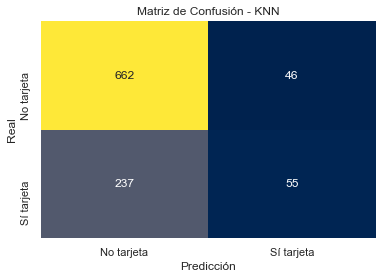

[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)
[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)

Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>
(c) son falsos negativos FN, (b) seran los falsos positivos FP



In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico tipo heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="cividis", cbar=False,
            xticklabels=["No tarjeta", "Sí tarjeta"],
            yticklabels=["No tarjeta", "Sí tarjeta"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

print("[[578 130]   → Verdaderos Negativos (TN) | Falsos Positivos (FP)")
print( "[[201  91]]  → Falsos Negativos (FN)   | Verdaderos Positivos (TP)")
print()
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos TP(d), como los verdaderos negativos TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado>>")
print("(c) son falsos negativos FN, (b) seran los falsos positivos FP")
print()

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test_scaled)

ModuleNotFoundError: No module named 'imblearn'